In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/creditcardfraud/creditcard.csv


In [1]:
!pip install pycaret

     |████████████████████████████████| 188 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 259 kB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 63.9 MB 7.9 kB/s  eta 0:00:01     |██████████████████▋             | 37.2 MB 11.8 MB/s eta 0:00:03
     |████████████████████████████████| 92 kB 182 kB/s  eta 0:00:01
     |████████████████████████████████| 378 kB 38.0 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 5.1 MB/s  eta 0:00:01
     |████████████████████████████████| 81 kB 6.3 MB/s  eta 0:00:01
     |████████████████████████████████| 7.0 MB 15.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 48.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 41.2 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 142.8 MB 37 kB/s s eta 0:00:01
     |████████████████████████████████| 2.1 MB 35.9 MB/s eta 0:00:01
     |██████████████████████████████

     |████████████████████████████████| 6.1 MB 34.8 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 2.8 MB/s  eta 0:00:01


  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=378424 sha256=99b8db60081f493e8ba42547e9624401790fbf3352bd878d138c370aa01e45f3
  Stored in directory: /root/.cache/pip/wheels/a7/ff/03/886798ca6fff0eb242a9a2d4b61ab1a1523eda4204632d811b
  Created wheel for pyod: filename=pyod-0.7.8.2-py3-none-any.whl size=104995 sha256=6abfcd4a952e7c21676151c89eef3a647c1c24621b4db9b322f2619215740c9e
  Stored in directory: /root/.cache/pip/wheels/10/fe/00/43c92b20898d143981b2c5af301b279efad92768151812a8ac
  Created wheel for cufflinks: filename=cufflinks-0.17.0-py3-none-any.whl size=67743 sha256=c96faa8211598a1d8bb65144216e02fc6d0032fb3a8e6a5a1fad5ab95d74381c
  Stored in directory: /root/.cache/pip/wheels/68/60/9c/e07fd834e76cdfa10d9f0b4facd1656a4d50eee7f62e682190
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=670af6aa448523a63fff6ce7da975ad20e702f9fe7370deea3eaa6a626568f96
  Stored in directory: /root/.cache/pip

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
import seaborn as sn
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


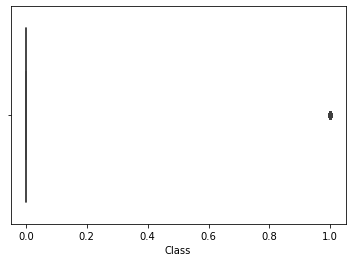

In [17]:
sn.boxplot(df["Class"])

In [14]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
from pycaret.classification import *

In [21]:
set_up=setup(data=df,target="Class")

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2620
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [23]:
compare_models()

IntProgress(value=0, description='Processing: ', max=170)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:21:35
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9995,0.9224,0.7641,0.9460,0.8436,0.8434
1,Decision Tree Classifier,0.9992,0.8819,0.7641,0.7629,0.7629,0.7625
2,Ada Boost Classifier,0.9992,0.9753,0.7090,0.8020,0.7503,0.7499
3,Logistic Regression,0.9990,0.9119,0.6831,0.7446,0.7094,0.7089
4,Ridge Classifier,0.9989,0.0000,0.4330,0.8739,0.5749,0.5745
5,K Neighbors Classifier,0.9983,0.5973,0.0291,0.6000,0.0550,0.0549
6,SVM - Linear Kernel,0.9982,0.0000,0.0000,0.0000,0.0000,-0.0001
7,Naive Bayes,0.9931,0.9677,0.6455,0.1515,0.2451,0.2429
8,Quadratic Discriminant Analysis,0.9763,0.9718,0.8719,0.0603,0.1128,0.1099


KeyboardInterrupt: 

In [24]:
#creating finalised model
xgboost_model=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9997,0.9775,0.8857,0.9394,0.9118,0.9116
1,0.9995,0.9881,0.7714,0.9643,0.8571,0.8569
2,0.9993,0.9809,0.7143,0.8621,0.7813,0.7809
3,0.9996,0.9717,0.8286,0.9355,0.8788,0.8786
4,0.9996,0.9781,0.7941,1.0000,0.8852,0.8851
5,0.9995,0.9888,0.8529,0.8788,0.8657,0.8654
6,0.9996,0.9842,0.7941,0.9643,0.8710,0.8708
7,0.9995,0.9735,0.7353,0.9615,0.8333,0.8331
8,0.9996,0.9822,0.8529,0.9062,0.8788,0.8786
9,0.9993,0.9795,0.6765,0.9200,0.7797,0.7793


In [25]:
#properties of xgboost model
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2620,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [26]:
#Tuning hyperparameters

xgboost_tuned_model=tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9998,0.9892,0.9143,0.9697,0.9412,0.9411
1,0.9997,0.9864,0.8286,1.0000,0.9062,0.9061
2,0.9993,0.9833,0.7143,0.8621,0.7813,0.7809
3,0.9995,0.9727,0.8286,0.9062,0.8657,0.8654
4,0.9995,0.9742,0.7353,1.0000,0.8475,0.8472
5,0.9997,0.9858,0.8529,0.9667,0.9062,0.9061
6,0.9995,0.9873,0.7647,0.9630,0.8525,0.8522
7,0.9994,0.9707,0.7353,0.9259,0.8197,0.8194
8,0.9997,0.9719,0.8529,0.9667,0.9062,0.9061
9,0.9993,0.9844,0.6765,0.8846,0.7667,0.7663


In [ ]:
xgboost_tuned_model